**#Q1 [15 pts]: Fit a logistic regression model using all variable**

In [2]:
#importing libraries
import numpy as np
import os.path as osp
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from scipy.stats import norm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
#load data
df = pd.read_csv(r'C:\Users\Jose Chua\OneDrive\Python\School Snek Work\867\MusicData.csv',encoding='ISO-8859-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7574 entries, 0 to 7573
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      7574 non-null   int64  
 1   songtitle                 7574 non-null   object 
 2   artistname                7574 non-null   object 
 3   songID                    7574 non-null   object 
 4   artistID                  7574 non-null   object 
 5   timesignature             7574 non-null   int64  
 6   timesignature_confidence  7574 non-null   float64
 7   loudness                  7574 non-null   float64
 8   tempo                     7574 non-null   float64
 9   tempo_confidence          7574 non-null   float64
 10  key                       7574 non-null   int64  
 11  key_confidence            7574 non-null   float64
 12  energy                    7574 non-null   float64
 13  pitch                     7574 non-null   float64
 14  timbre_0

In [7]:
#splitting data
train_df = df[df['year'] <= 2009]
test_df = df[df['year'] == 2010]

In [9]:
#Exclude the variables "year," "songtitle," "artistname," "songID," and "artistID" from the dataset as independent variables.
columns_to_exclude = ["year", "songtitle", "artistname", "songID", "artistID"]
train_df = train_df.drop(columns=columns_to_exclude)
test_df = test_df.drop(columns=columns_to_exclude)

In [10]:
# Building a logistic regression model to predict Top10 using the training data.
X_train = train_df.drop(columns="Top10")
y_train = train_df["Top10"]

In [11]:
#adding constant column
X_train_sm = sm.add_constant(X_train)

In [22]:
#scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


In [26]:
# Fit the model using sklearn with regularization (L2 by default)
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

In [27]:
# Building the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Displaying the summary
result.summary()

Optimization terminated successfully.
         Current function value: 0.330451
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Top10   No. Observations:                 7201
Model:                          Logit   Df Residuals:                     7167
Method:                           MLE   Df Model:                           33
Date:                Fri, 30 Aug 2024   Pseudo R-squ.:                  0.2091
Time:                        22:07:39   Log-Likelihood:                -2379.6
converged:                       True   LL-Null:                       -3008.8
Covariance Type:            nonrobust   LLR p-value:                2.683e-243
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       14.7000      1.806      8.138      0.000      11.160      18.240
timesignature                0.1264      0.087      1.457      0.145      -0.044       0.296
timesignature_confidence     0.7450      0.195      3.814      0.000       0.362       1.128
loudness                     0.2999      0.029     10.282      0.000       0.243       0.357
tempo                        0.0004      0.002      0.215      0.830      -0.003       0.004
tempo_confidence             0.4732      0.142      3.328      0.001       0.195       0.752
key                          0.0159      0.010      1.529      0.126      -0.004       0.036
key_confidence               0.3087      0.141      2.187      0.029       0.032       0.585
energy                      -1.5021      0.310     -4.847      0.000      -2.110      -0.895
pitch                      -44.9077      6.835     -6.570      0.000     -58.304     -31.511
timbre_0_min                 0.0232      0.004      5.441      0.000       0.015       0.032
timbre_0_max                -0.3310      0.026    -12.882      0.000      -0.381      -0.281
timbre_1_min                 0.0059      0.001      7.542      0.000       0.004       0.007
timbre_1_max                -0.0002      0.001     -0.342      0.732      -0.002       0.001
timbre_2_min                -0.0021      0.001     -1.889      0.059      -0.004    7.95e-05
timbre_2_max                 0.0007      0.001      0.726      0.468      -0.001       0.002
timbre_3_min                 0.0007      0.001      1.156      0.248      -0.000       0.002
timbre_3_max                -0.0030      0.001     -5.103      0.000      -0.004      -0.002
timbre_4_min                 0.0104      0.002      5.237      0.000       0.007       0.014
timbre_4_max                 0.0061      0.002      3.942      0.000       0.003       0.009
timbre_5_min                -0.0056      0.001     -4.385      0.000      -0.008      -0.003
timbre_5_max              7.736e-05      0.001      0.097      0.922      -0.001       0.002
timbre_6_min                -0.0169      0.002     -7.445      0.000      -0.021      -0.012
timbre_6_max                 0.0037      0.002      1.675      0.094      -0.001       0.008
timbre_7_min                -0.0045      0.002     -2.554      0.011      -0.008      -0.001
timbre_7_max                -0.0038      0.002     -2.060      0.039      -0.007      -0.000
timbre_8_min                 0.0039      0.003      1.372      0.170      -0.002       0.009
timbre_8_max                 0.0040      0.003      1.336      0.182      -0.002       0.010
timbre_9_min                 0.0014      0.003      0.456      0.648      -0.005       0.007
timbre_9_max                 0.0016      0.002      0.659      0.510      -0.003       0.006
timbre_10_min                0.0041      0.002      2.244      0.025       0.001       0.008
timbre_10_max                0.0058      0.002      3.292      0.001       0.00

In [28]:
# Making predictions on the test set
X_test = test_df.drop(columns="Top10")
y_test = test_df["Top10"]
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]   # Probabilities of being in the "Top10" category

predicted_classes = (y_pred_prob > 0.15).astype(int)  # Convert these probabilities into class predictions (i.e., 1 for "Top10" and 0 otherwise) based on a threshold 0.15.

# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Computing the accuracy rate on the test set
test_accuracy = (predicted_classes == y_test).mean()

print(conf_matrix)
print(test_accuracy)

[[314   0]
 [ 57   2]]
0.8471849865951743


c:\Users\Jose Chua\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


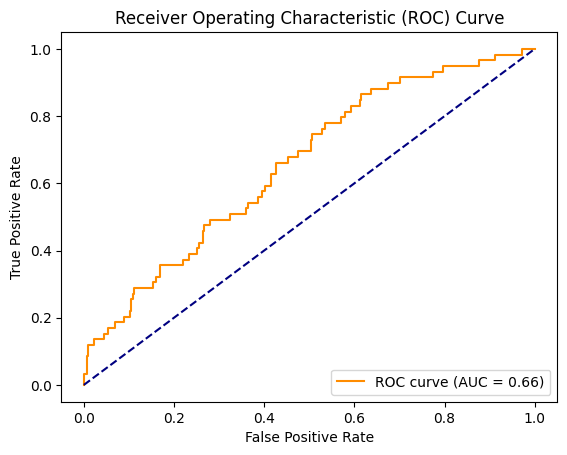

In [29]:
# Generating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()